### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Data Overview

In [4]:
df.shape # to see the dimension of the dataframe

(1898, 9)

#### Observations:


- There are 1898 rows of entries and a total of 9 columns in the dataframe.

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


- All columns have 1898 observations. No missing values detected.
- There are 5 numerical columns, `order_id`, `customer_id`, `food_preparation_time` and `delivery_time` are integers while  `cost_of_the_order` are floating numbers.
- `restaurant_name`, `cuisine_type`, `day_of_the_week` and `rating` are the object type/categorical columns  in this dataframe.

In [6]:
df.isnull().sum() # summing up the number of missing values in each column, if there is.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


- There are 0 missing values in all columns, also seen in *df.info()* stating 'non-null'.
- Hence no missing value treatment is taken.

In [7]:
df.describe(include='all') # including all data types

order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN               2          4                    NaN   
top                   NaN         Weekend  Not given                    NaN   
freq                  NaN            1351        736                    NaN   
mean            16.498851             NaN        NaN              27.371970   
std              7.483812             NaN        NaN               4.632481   
min              4.470000             NaN        NaN              20.000000   
25%             12.080000             NaN        NaN              23.000000   
50%             14.140000             NaN        NaN              27.000000   
75%             22.297500             NaN        NaN              31.000000   
max             35.410000             NaN        NaN              35.000000   

        delivery_time  
count     1898.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        24.161749  
std          4.972637  
min         15.000000  
25%         20.000000  
50%         25.000000  
75%         28.000000  
max         33.000000

#### Observations:


- The `order_id` is unique to every single order, which is not of an importance for inference. 
- `customer_id` is the unique ID of a particular customer  who has made an order to one or few of the restaurants in New York.
- A total of 178 unique restaurants are recorded in this dataset.
- There are 14 unique types of cuisine.
- Looking at `restaurant_name` and `cuisine_type`, it seems like American food is ordered frequently, the top ordered restaurant being 'Shake Shack'.
- The cost of the order ranges from around \$4.47 to \$35.41. The average cost \$16.50 being somewhat close to the median \$14.14 (~ approx \$2).
- The `day_of_the_week` is categorized into Weekday and Weekend.
- 71.2% of the orders are done during the weekend.
- There are 4 unique ratings. 736 orders were not given a rating.
- **The food preparation time ranges from minimum 20 minutes to maximum 35 minutes. 50% of the orders are around the average preparation time of 27 minutes.**
- The delivery time takes from a minumum 15 to maximum 33 minutes. 50% of the orders took 25 minutes to deliver, which is a minute more than the average delivery time of 24 minutes.
- There seem to be no noticeable outliers from the summary above.

In [8]:
df['rating'].value_counts() # counts the number of unique entries.

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


- There are a total of 736 orders are not given a rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

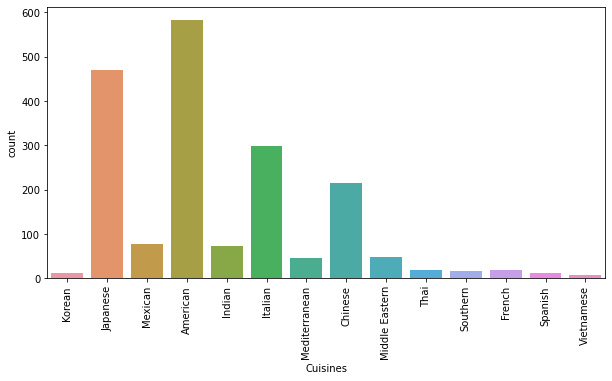

In [9]:
# bar plot of restaurants 
bar = px.bar(df,x='restaurant_name',
              labels={
                     "restaurant_name": "Restaurant",
                 }) 
bar.show()

plt.figure(figsize=(10,5));
sns.countplot(data=df,x='cuisine_type'); # bar plot of cuisine type
plt.xlabel('Cuisines')
plt.xticks(rotation=90);
plt.show();

In [10]:
# Looking at the total numer of orders of each restaurant also showing its type of cuisine.
# Ordered in descending order.
poprestaurant = df.groupby('restaurant_name')['cuisine_type'].value_counts().sort_values(ascending=False) 
poprestaurant

restaurant_name            cuisine_type
Shake Shack                American        219
Blue Ribbon Sushi          Japanese        119
The Meatball Shop          Italian         112
Blue Ribbon Fried Chicken  American         96
Parm                       Italian          68
                                          ... 
Klong                      Thai              1
Kambi Ramen House          Japanese          1
Il Bambino                 Italian           1
Hunan Manor                Chinese           1
Lamarca Pasta              Italian           1
Name: cuisine_type, Length: 179, dtype: int64

In [11]:
df['cuisine_type'].value_counts() # looking at the total number of orders in each cuisine

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

- It can be seen in this set of data, the restuarant that has the most order in New York is an american cuisine called 'Shake Shack'. The second most ordered being a japanese restaurant called 'Blue Ribbon Sushi'. While the third is an italian restaurant called 'The Meatball Shop'.
- There is a significant difference in the favor of the type of cuisine in New York. The first most ordered being American cuisines, followed by Japenese cuisines and the third being Italian cuisines. The noticeable fourth are Chinese cuisines. 
- Vietnamese cuisines is the least sought for in New York.

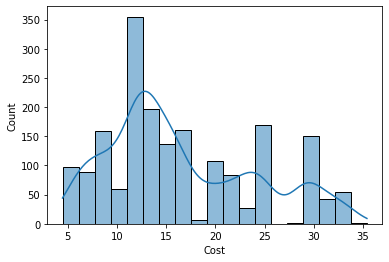

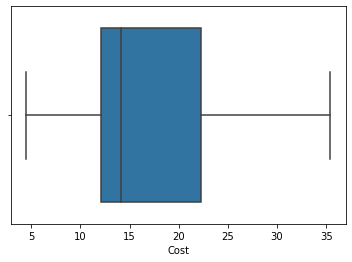

In [12]:
sns.histplot(data=df,x='cost_of_the_order',kde=True); # histogram of the cost of order showing the kernel density as well
plt.xlabel('Cost')
plt.show();
sns.boxplot(data=df,x='cost_of_the_order'); # boxplot of the cost of order
plt.xlabel('Cost')
plt.show();

- The distribution of the cost of the orders is right-skewed, where more data is to the left side of the distribution.
- 50% of the order cost less than \$14.14.

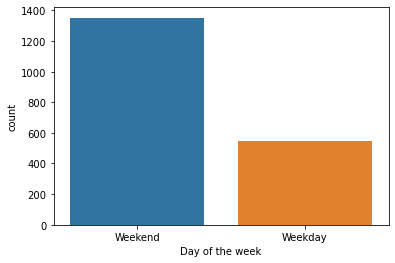

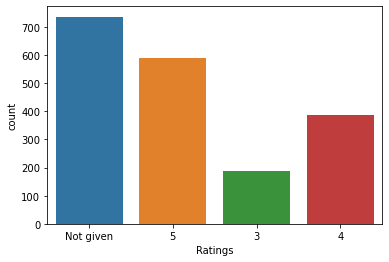

In [13]:
sns.countplot(data=df,x='day_of_the_week'); # barplot of the day of the week
plt.xlabel('Day of the week')
plt.show();
sns.countplot(data=df,x='rating'); # barplot of the ratings
plt.xlabel('Ratings')
plt.show();

- 71.2% of the order is taken during the weekend.
- Although a lot of orders are not given a rating, there are at least 51% of the orders are rated 4s and 5s, orders rated 3 has the least count.

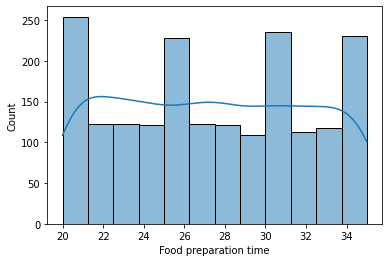

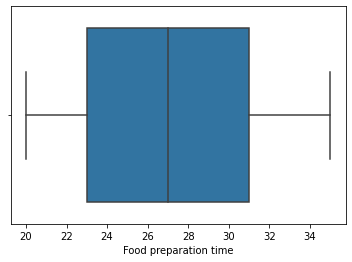

In [14]:
sns.histplot(data=df,x='food_preparation_time',kde=True); # histogram of food preparation time showing the kernel density as well
plt.xlabel('Food preparation time')
plt.show();
sns.boxplot(data=df,x='food_preparation_time'); # boxplot of food preparation time
plt.xlabel('Food preparation time')
plt.show();

- The food preparation time is somewhat evenly distributed.
- 50% of the order took around 27 minutes to finish preparing.

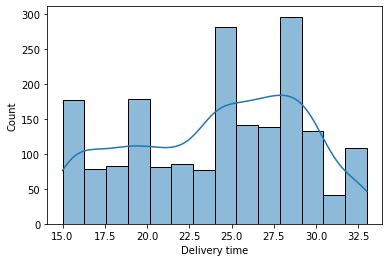

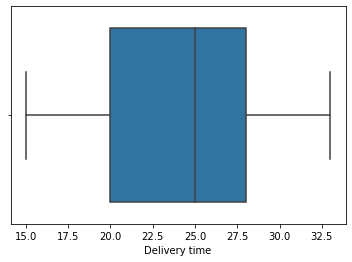

In [15]:
sns.histplot(data=df,x='delivery_time',kde=True); # histogram of delivery time showing the kernel density as well
plt.xlabel('Delivery time')
plt.show();
sns.boxplot(data=df,x='delivery_time'); # boxplot of delivery time
plt.xlabel('Delivery time')
plt.show();

- The delivery time is slightly left-skewed where slightly more data is on the right side of the distribution.
- 50% of the order took 25 minutes to be delivered.

#### Observations:

- Popular restaurants tends to have more orders.
- There is a significant difference in the favor of the type of cuisines in New York.
- The overall median of order cost is \$14.14.
- Orders are made more during weekend compared to weekdays.
- Apart from non-rated orders, majority orders are given good rating (rating of 4s and 5s).
- Food preparation time seems uniformly distributed with an average of 27 minutes.
- 50% of the order took 25 minutes to be delivered.

In [16]:
# counting the number of orders in each restaurant while sorting them in descending order
# and then looking at the top 5 most ordered restaurants
orderedrestaurant = df['restaurant_name'].value_counts().sort_values(ascending=False) 
orderedrestaurant.head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


- 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm' are the top 5 restaurants (in order) that has the most orders received.

In [17]:
# extract orders that are taken during the weekend 
# then count the number of order based on the type of the cuisine
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:


- During the weekends, American food is the most sought for.

In [18]:
# extract orders cost more than $20 and compute the percentage from the all the orders.
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations:


- 29.24% of the orders cost more than \$20.

In [19]:
df['delivery_time'].mean() # simple calculation on the average in delivery time column

24.161749209694417

#### Observations:


- On average it takes around 24 minutes to deliver an order in New York.

In [20]:
df['customer_id'].value_counts().head() # sum up the number of unique ID appearance in customer_id column

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:

- Customer ID 52832 placed the most orders with a total of 13.
- Customer ID 47440, 83287, 250494, 259341 placed 10, 9 ,8, 7 orders respectively.

### Multivariate Analysis

 **1) Start off with looking at the relationships between numerical columns**

<Figure size 2160x504 with 0 Axes>

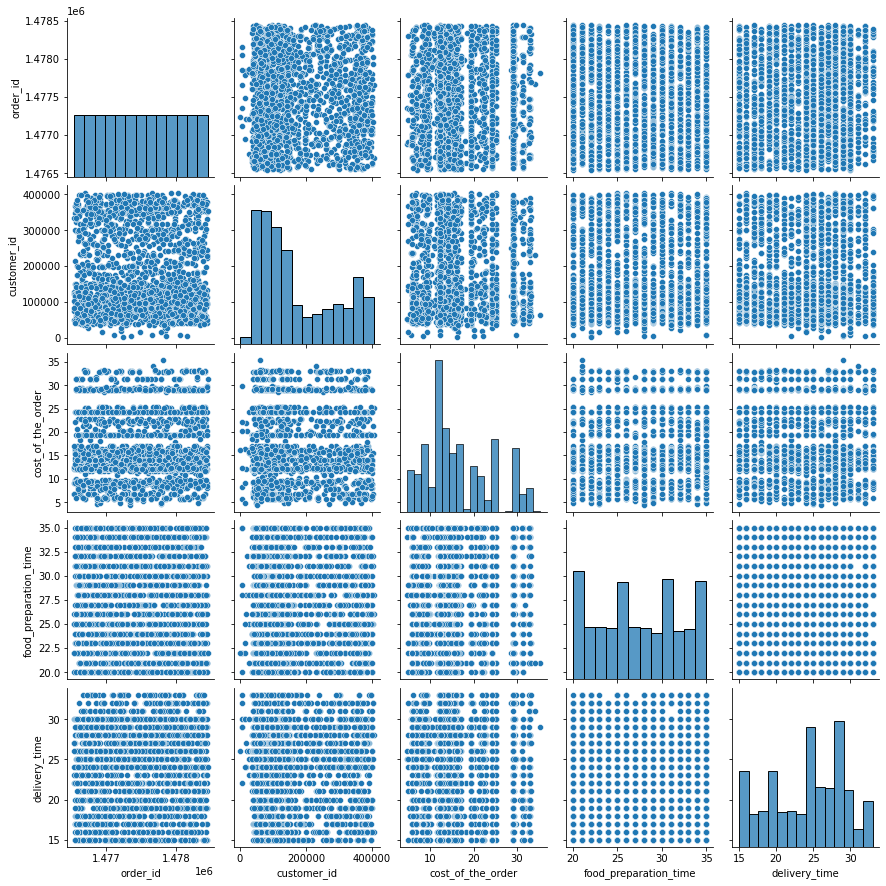

In [21]:
plt.figure(figsize=(30,7));
sns.pairplot(data=df); # matrix scatterplot of numerical columns
plt.show();

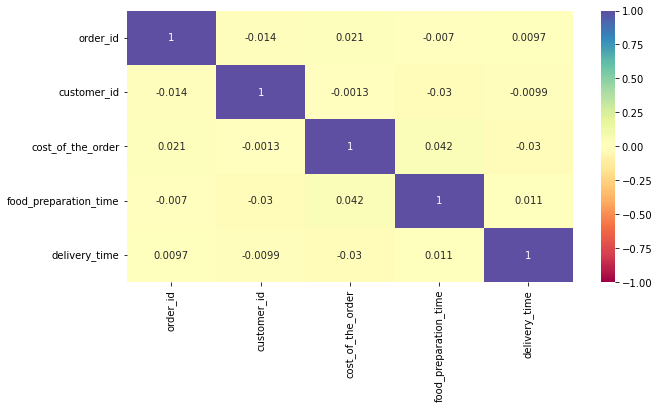

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1) # heatmap of numerical columns
plt.show()

#### Observations:

- No significant relationships or correlation can be detected between the numerical columns based on the scatter plots and heatmap above.

**2) Studying possible relationship with the cost of orders**

*Having a look at only the top 10 restaurants*

In [23]:
# looking only at the top 10 restaurants
top10 =  df[df['restaurant_name'].isin(orderedrestaurant.head(10).index.to_list())]

# boxplot of cost and top 10 restaurants
box = px.box(top10,x='cost_of_the_order', y='restaurant_name',
            labels={
                     "cost_of_the_order": "Cost",
                     "restaurant_name": "Top 10 restaurant",
                 })
box.show()

# marginal heatmap plot of cost and top 10 restaurants
margplot = px.density_heatmap(top10, x="cost_of_the_order",y="restaurant_name", marginal_x="box", marginal_y="histogram",
                              labels={
                                  "cost_of_the_order": "Cost",
                                  "restaurant_name": "Top 10 restaurant",
                              })
margplot.show()

- 25% of orders from the top 10 restaurants cost more than \$10. While 75% of orders cost less than \$25.
- Only 'Shake Shack' and 'TAO' has 50% of orders cost more than \$15, while the others are below \$15.
- It can also be observed that very popular restaurants tends to have more orders.

In [24]:
# marginal heatmap plot of cost and cuisine type
margplot = px.density_heatmap(df, x="cost_of_the_order",y="cuisine_type", marginal_x="box", marginal_y="histogram",
                              labels={
                                  "cost_of_the_order": "Cost",
                                  "cuisine_type": "Cuisine",
                           })
margplot.show()

- We can see that there is a sharp contrast on the type of cuisine ordered in New York

In [25]:
# boxplot of cost and day of the week
box = px.box(df,x='cost_of_the_order',y='day_of_the_week',
            labels={
                                  "cost_of_the_order": "Cost",
                                  "day_of_the_week": "Day of the week",
                              })
box.show()
# marginal heatmap plot of cost and day of the week
margplot = px.density_heatmap(df, x="cost_of_the_order",y="day_of_the_week", marginal_x="box", marginal_y="histogram",
                              labels={
                                  "cost_of_the_order": "Cost",
                                  "day_of_the_week": "Day of the week",
                              })
margplot.show()

- No significant difference on the cost of the orders whether its weekday or weekend appart from that weekends has more orders.

In [26]:
# boxplot of cost and ratings
box = px.box(df,y='cost_of_the_order',x='rating',
            labels={
                                  "cost_of_the_order": "Cost",
                                  "rating": "Ratings",
                              })
box.show()
# marginal heatmap plot of cost and ratings
margplot = px.density_heatmap(df, x="cost_of_the_order",y="rating", marginal_x="box", marginal_y="histogram",
                              labels={
                                  "cost_of_the_order": "Cost",
                                  "rating": "Ratings",
                              })
margplot.show()

- No particular pattern can be seen between cost and rating.

In [27]:
# boxplot of cost and food preperation time
box = px.box(df,y='cost_of_the_order',x='food_preparation_time',
            labels={
                                  "cost_of_the_order": "Cost",
                                  "food_preparation_time": "Food preparation time",
                              })
box.show()

# marginal heatmap plot of cost and food preparation time
margplot = px.density_heatmap(df, x="cost_of_the_order",y="food_preparation_time", marginal_x="box", marginal_y="box",
                              labels={
                                  "cost_of_the_order": "Cost",
                                  "food_preparation_time": "Food preparation time",
                              })
margplot.show()

- There is also no apparent pattern betweem cost and food preparation time.

In [28]:
# boxplot of cost and delivery time
box = px.box(df,y='cost_of_the_order',x='delivery_time',
            labels={
                                  "cost_of_the_order": "Cost",
                                  "delivery_time": "Delivery time",
                              })
box.show()

# marginal heatmap plot of cost and delivery time
margplot = px.density_heatmap(df, x="cost_of_the_order",y="delivery_time", marginal_x="box", marginal_y="box",
                              labels={
                                  "cost_of_the_order": "Cost",
                                  "delivery_time": "Delivery time",
                              })
margplot.show()

- There also no apparent pattern between cost and delivery time.

#### Observations:

- Popular restaurants, are seen again, tends to have more orders.
- American, Japanese, Italian and Chinese cuisines appears to be dominant in New York.
- More orders are taken in the weekend.
- Overall, the cost of order doesn't seem to be an important variable here.

**3) Studying possible relationship with cuisine types**

In [29]:
# marginal heatmap plot of day of the week and cuisine type
margplot = px.density_heatmap(df, x="day_of_the_week",y="cuisine_type", marginal_x="histogram", marginal_y="histogram",
                              labels={
                                  "day_of_the_week": "Day of the week",
                                  "cuisine_type": "Cuisines",
                              });
margplot.show();

- The top 4 cuisines has orders in the weekends more than weekdays by at least a factor of 2.

In [30]:
# marginal heatmap plot of rating and cuisine type
margplot = px.density_heatmap(df, x="rating",y="cuisine_type", marginal_x="histogram", marginal_y="histogram",
                              labels={
                                  "rating": "Ratings",
                                  "cuisine_type": "Cuisines",
                              });
margplot.show()

- We can see that most of the orders, whether they are given or not given a rating, comes from the top 4 cuisines.

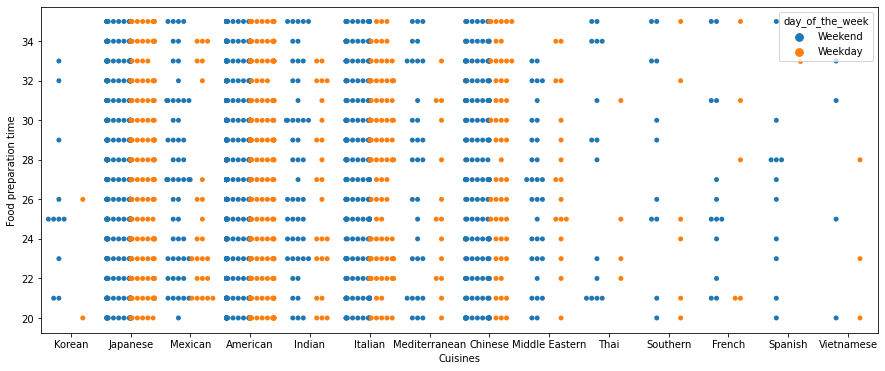

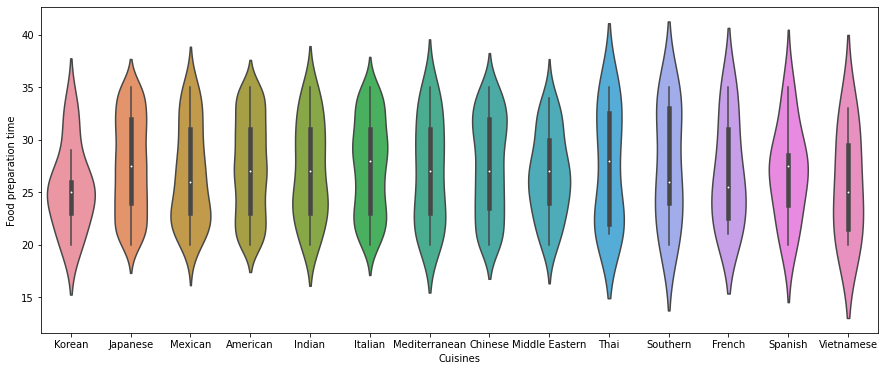

In [31]:
# swarmplot of cuisine type and food_preparation time
plt.figure(figsize=(15, 6))
sns.swarmplot(data=df, x='cuisine_type', y='food_preparation_time',hue='day_of_the_week',dodge=True);
plt.ylabel('Food preparation time')
plt.xlabel('Cuisines');
plt.show()

# violinplot of cuisine type and food_preparation time
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='cuisine_type', y='food_preparation_time');
plt.ylabel('Food preparation time')
plt.xlabel('Cuisines');
plt.show()

- The food preparation time are mostly uniform except Korean, Mediterranean and Spanish cuisines.

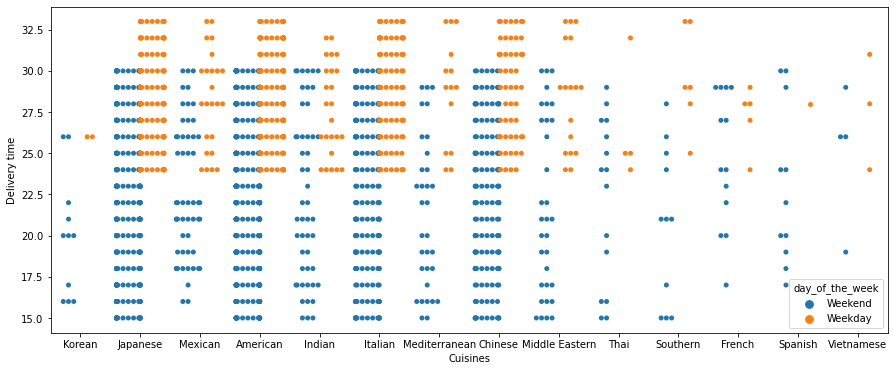

In [32]:
# swarmplot of cuisine type and delivery time
plt.figure(figsize=(15, 6))
sns.swarmplot(data=df, x='cuisine_type', y='delivery_time',hue='day_of_the_week',dodge=True);
plt.ylabel('Delivery time')
plt.xlabel('Cuisines');
plt.show()

- A distinct pattern on delivery times. Throughout the weekdays, it takes at least 24 minutes to deliver. However for the weekends, it takes at earliest 15 minutes until the latest 30 minutes to deliver an order.

#### Observations:

- American, Japanese, Italian and Chinese cuisines were frequently ordered throughout the week.
- This followed by the greater number of ratings received on the top 4 cuisines.
- `food_preparation_time` also doesn't seem to be an important variable.

**4) Study possible relationship with ratings**

In [33]:
# marginal heatmap plot of top 10 restaurants and ratings
margplot = px.density_heatmap(top10, y="restaurant_name",x="rating", marginal_x="histogram", marginal_y="histogram",
                              labels={
                                  "restaurant_name": "Top 10 restaurants",
                                  "rating": "Ratings",
                              })
margplot.show()

- Although significant amout of orders are not rated, popular restaurants often given more ratings.

In [34]:
# marginal heatmap plot of ratings and day of the week
margplot = px.density_heatmap(df, y="day_of_the_week",x="rating", marginal_x="histogram", marginal_y="histogram",
                              labels={
                                  "day_of_the_week": "Day of the week",
                                  "rating": "Ratings",
                              })
margplot.show()

- Orders are rated more often in the weekends.

In [ ]:
# boxplot of delivery time and ratings
box = px.box(df,y='delivery_time',x='rating',
            labels={
                                  "delivery_time": "Delivery time",
                                  "rating": "Ratings",
                              })
box.show()

# marginal heatmap plot of ratings and delivery time
margplot = px.density_heatmap(df, y='delivery_time',x="rating", marginal_x="histogram", marginal_y="box",
                              labels={
                                  "delivery_time": "Delivery time",
                                  "rating": "Ratings",
                              })
margplot.show()

# swarmplot of ratings and delivery time
plt.figure(figsize=(15, 6))
sns.swarmplot(data=df, x='rating', y='delivery_time',hue='day_of_the_week',dodge=True);
plt.ylabel('Delivery time')
plt.xlabel('Ratings');
plt.show()

- There seem to be relationships for ratings between the restaurant, and the day of the week. But no particular pattern between rating and delivery time.

#### Observations:

- Based on observations above, `restaurant_name`, `cuisine_type`, `day_of_the_week`, `rating` and `delivery_time` serves to be our important variable in this dataset.

**5) We study closely the identified important variables**

In [ ]:
sns.histplot(data=top10, x="restaurant_name",hue='rating',kde=True) # histogram plot of top 10 restaurant and ratings
plt.xlabel('Top 10 restaurants')
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=top10,x='restaurant_name',y='delivery_time',hue='day_of_the_week') # bar plot of top 10 restaurant and delivery time
plt.xlabel('Top 10 restaurants')
plt.xticks(rotation=90)
plt.show()

- The top 4 restaurants, 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi' and 'Blue Ribbon Fried Chicken', gets rated more often. Most of their orders are greatly rated with 4s and 5s.
- Among the top 10 restaurants delivery time is, again, different between weekdays and weekends, but minor difference inbetween restaurants.

In [ ]:
sns.histplot(data=df, x="cuisine_type",hue='day_of_the_week',kde=True) # histogram of cuisines and day of the week, showing kernel density estimation as well
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.show()

sns.pointplot(data=df, x="cuisine_type",y='delivery_time',hue='day_of_the_week') # point plot of cuisines and delivery time
plt.ylabel('Delivery time')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.show()

- The top 4 cuisines has the most favor in New York.
- A noticeable changing pattern between weekdays and weekends for Indian, Mediterranean, Thai, Southern, French, Spanish and Vietnamese cuisines.
- But overall, weekdays takes longer delivery time.

In [ ]:
sns.swarmplot(data=df, y="cuisine_type",x='rating') # swarmplot of cuisines and ratings
plt.ylabel('Cuisines')
plt.xlabel('Ratings')
plt.show()

plt.figure(figsize=(15, 6))
sns.swarmplot(data=df, y="cuisine_type",x='rating',hue='day_of_the_week',dodge=True) # swarmplot of cuisines and ratings classified in to day of the week
plt.ylabel('Delivery time')
plt.xlabel('Ratings')
plt.show()

- More orders are rated during the weekends.
- The top 4 cuisines received the most ratings both during weekdays and weekends.

#### Observations:

The dataset tells us that:
- Weekends are, of course, busier with orders compared to weekdays.
- The population tends to search for popular restaurants.
- The population also often look for American, Japanese, Italian and Chinese cuisines.
- Many prefer rating the orders during the weekend.
- Although there are no relationship between rating and delivery time, weekends has shorter delivery time compared to weekdays.

In [ ]:
droppeddf = df[df['rating'].str.contains('Not given')==False] # drop rows that has 'Not given' rating
droppeddf['rating'] = pd.to_numeric(droppeddf['rating']) # convert 'rating' column to integers for calculations 
droppeddf.groupby('restaurant_name').agg(total=('rating','size'), 
                                         average=('rating','mean')).sort_values('total',ascending=False).head(10) # compute rating counts and the average rating for each restaurant

#### Observations:


- 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', and 'Blue Ribbon Fried Chicken' are qualified to get the promotional offer.

In [ ]:
net_revenue = 0 # set starting value
for i in range(len(df['cost_of_the_order'])):
    if (df['cost_of_the_order'][i] > 5) & (df['cost_of_the_order'][i] <= 20): # condition when order greater than 5 dollars
        net_revenue = net_revenue + df['cost_of_the_order'][i]*0.15
    elif df['cost_of_the_order'][i] > 20: # condition when order greater than 20 dollars
        net_revenue = net_revenue + df['cost_of_the_order'][i]*0.25
    else: # condition when order is less than or equal to 5 dollars
        pass
        
net_revenue

#### Observations:


- The FoodHub company generated \$4690.81 across all the 1898 orders.

In [ ]:
totaltime=df['food_preparation_time']+df['delivery_time'] # compute the total time taken for each order
totaltime[totaltime > 60].shape[0]/totaltime.shape[0]*100 # compute the percentage

#### Observations:


- 10.54% of orders took more than 60 minutes to deliver.

In [ ]:
df.groupby('day_of_the_week')['delivery_time'].mean() # groupby day of the week and compute mean delivery time

#### Observations:


- The average time of delivery during the weekdays is about 28 minutes.
- The average time of delivery during the weekends is about 22 minutes, on average 6 minutes faster than during the weekdays.

### Conclusion and Recommendations

### Conclusions:
 
* Weekends are, of course, busier with orders compared to weekdays.
* The population tends to search for popular restaurants.
* The population also often look for American, Japanese, Italian and Chinese cuisines.
* Many prefer rating the orders during the weekend.
* Although there are no relationship between rating and delivery time, weekends has shorter delivery time compared to weekdays.
* The cost of the orders doesn't seem to affect how the customers make an order.

### Recommendations:

*  Having different charges/discounts/offers between weekdays and weekends is an option.
*  Same as for cuisine types, depending on the objective of the company, extra charges or variety of discounts/offers on the type of cuisines is another option.
*  Promotional offer criteria in Q13 can be relaxed to include more potential restaurants and so increase revenue from advertisement.
*  Regarding charges based on cost as in Q14, maybe a slight change on 25% charge to order cost more than say \$15 or less than \$20. Since 50% of the orders are at the cost of \$14.14, and customers tends to order based on the type of cuisines, popularity, and day of the week. This could be a reasonable source of revenue.


---